In [9]:
import keras #Import Lıbraries
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
import os, shutil

In [26]:
# Dataset path 
original_dataset_dir = '/home/furkan/Desktop/6.Season/Deep Learning/Odev/Dataset'


# New data directory
base_dir = '/home/furkan/Desktop/6.Season/Deep Learning/BandvsCalculator'
os.mkdir(base_dir)

# Divided and edited data
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Band images for train in 'band directory'
train_band_dir = os.path.join(train_dir, 'band')
os.mkdir(train_band_dir)

# Calculator images for train in 'calculator directory'
train_calculator_dir = os.path.join(train_dir, 'calculator')
os.mkdir(train_calculator_dir)

# Band images for validation in 'band directory'
validation_band_dir = os.path.join(validation_dir, 'band')
os.mkdir(validation_band_dir)

# Calculator images for validaton in 'calculator directory'
validation_calculator_dir = os.path.join(validation_dir, 'calculator')
os.mkdir(validation_calculator_dir)

# Band images for test in 'band directory'
test_band_dir = os.path.join(test_dir, 'band')
os.mkdir(test_band_dir)

# Calculator images for test in 'calculator directory'
test_calculator_dir = os.path.join(test_dir, 'calculator')
os.mkdir(test_calculator_dir)

# Copy first 59 band images to train_band_dir 
fnames = ['{}.jpg'.format(i) for i in range(1, 60)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_band_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 23 band images to validation_band_dir
fnames = ['{}.jpg'.format(i) for i in range(60, 83)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_band_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 24 band images to test_band_dir
fnames = ['{}.jpg'.format(i) for i in range(83, 107)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_band_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 60 calculator images to train_calculator_dir
fnames = ['{}.jpg'.format(i) for i in range(107,167)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_calculator_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 23 dog calculator to validation_calculator_dir
fnames = ['{}.jpg'.format(i) for i in range(167, 190)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_calculator_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 24 calculator images to test_calculator_dir
fnames = ['{}.jpg'.format(i) for i in range(190, 214)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_calculator_dir, fname)
    shutil.copyfile(src, dst)

In [27]:
print('total training band images:', len(os.listdir(train_band_dir)))

total training band images: 59


In [28]:
print('total training calculator images:', len(os.listdir(train_calculator_dir)))

total training calculator images: 60


In [29]:
print('total validation band images:', len(os.listdir(validation_band_dir)))

total validation band images: 23


In [30]:
print('total validation calculator images:', len(os.listdir(validation_calculator_dir)))

total validation calculator images: 23


In [31]:
print('total test band images:', len(os.listdir(test_band_dir)))

total test band images: 24


In [32]:
print('total test calculator images:', len(os.listdir(test_calculator_dir)))

total test calculator images: 24


In [34]:
#First Model

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [37]:
from keras import optimizers         #Optimizer, loss function ve performance metric selection

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])           

In [38]:
# Image Normalization and resize

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 119 images belonging to 2 classes.
Found 46 images belonging to 2 classes.


In [39]:
for data_batch, labels_batch in train_generator:    #We are looking the result and we'll see count of sample in every particule 
    print('data batch shape:', data_batch.shape)                
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 150, 150, 3)
labels batch shape: (10,)


In [40]:
history = model.fit_generator(    #Train the model
      train_generator,
      steps_per_epoch=30,
      epochs=8,
      validation_data=validation_generator,
      validation_steps=5)

W0712 11:54:22.210303 140284232300352 deprecation_wrapper.py:119] From /home/furkan/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/8
30/30 [==============================] - 67s 2s/step - loss: 0.5818 - acc: 0.7115 - val_loss: 0.2969 - val_acc: 0.9348
Epoch 2/8
30/30 [==============================] - 68s 2s/step - loss: 0.3512 - acc: 0.8352 - val_loss: 0.2248 - val_acc: 0.9130
Epoch 3/8
30/30 [==============================] - 67s 2s/step - loss: 0.2669 - acc: 0.8889 - val_loss: 0.1325 - val_acc: 0.9348
Epoch 4/8
30/30 [==============================] - 65s 2s/step - loss: 0.2167 - acc: 0.9096 - val_loss: 0.1239 - val_acc: 0.9348
Epoch 5/8
30/30 [==============================] - 68s 2s/step - loss: 0.1834 - acc: 0.9293 - val_loss: 0.0938 - val_acc: 0.9783
Epoch 6/8
30/30 [==============================] - 75s 2s/step - loss: 0.1634 - acc: 0.9363 - val_loss: 0.0763 - val_acc: 0.9783
Epoch 7/8
30/30 [==============================] - 73s 2s/step - loss: 0.1200 - acc: 0.9559 - val_loss: 0.0481 - val_acc: 1.0000
Epoch 8/8
30/30 [==============================] - 77s 3s/step - loss: 0.1006 - acc: 0.9633 - val

In [25]:
model.save('band_calculator_small_1.h5')  # We are saving first model

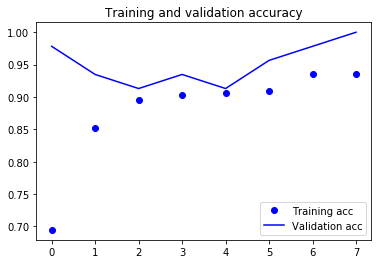

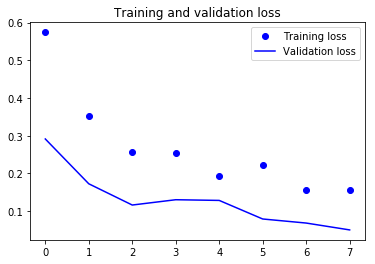

In [26]:
import matplotlib.pyplot as plt           # See train and validation values on the chart

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
#Data Augmentation (We are duplicating ımages for accuracy)

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

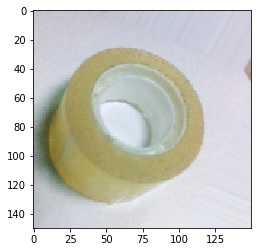

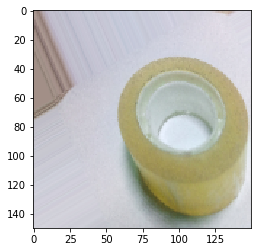

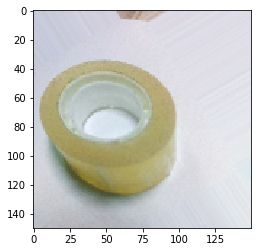

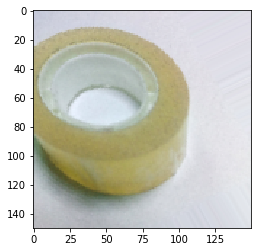

In [28]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_band_dir, fname) for fname in os.listdir(train_band_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()   #Duplicated Images:

In [32]:
# Second Model
# We're adding Dropout layer for break the routine before flatten

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 64)        36928     
__________

In [40]:
# Fit the second model

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=8,
      validation_data=validation_generator,
      validation_steps=5)

Found 119 images belonging to 2 classes.
Found 46 images belonging to 2 classes.
Epoch 1/8
10/10 [==============================] - 244s 24s/step - loss: 0.3186 - acc: 0.8823 - val_loss: 0.1788 - val_acc: 0.9839
Epoch 2/8
10/10 [==============================] - 196s 20s/step - loss: 0.4285 - acc: 0.8195 - val_loss: 0.2364 - val_acc: 0.9528
Epoch 3/8
10/10 [==============================] - 216s 22s/step - loss: 0.3178 - acc: 0.8630 - val_loss: 0.1463 - val_acc: 0.9194
Epoch 4/8
10/10 [==============================] - 194s 19s/step - loss: 0.3431 - acc: 0.8384 - val_loss: 0.1785 - val_acc: 0.9528
Epoch 5/8
10/10 [==============================] - 210s 21s/step - loss: 0.3283 - acc: 0.8667 - val_loss: 0.1516 - val_acc: 0.9274
Epoch 6/8
10/10 [==============================] - 181s 18s/step - loss: 0.3115 - acc: 0.8565 - val_loss: 0.1220 - val_acc: 0.9434
Epoch 7/8
10/10 [==============================] - 189s 19s/step - loss: 0.3171 - acc: 0.8593 - val_loss: 0.1379 - val_acc: 0.9597
Ep

In [41]:
model.save('band_and_calculator_small_2.h5')

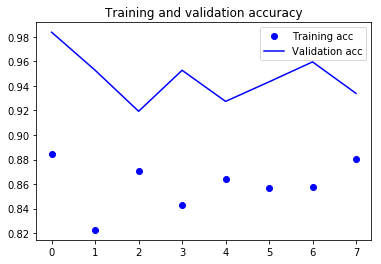

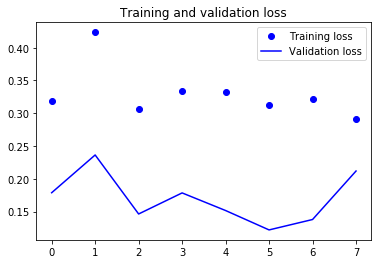

In [42]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [37]:
# Third Model : Cut in half, epoch value

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [39]:
#Fit the model

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=4,
      validation_data=validation_generator,
      validation_steps=5)

Found 119 images belonging to 2 classes.
Found 46 images belonging to 2 classes.
Epoch 1/4
10/10 [==============================] - 251s 25s/step - loss: 0.6855 - acc: 0.5869 - val_loss: 0.6276 - val_acc: 0.6129
Epoch 2/4
10/10 [==============================] - 208s 21s/step - loss: 0.6550 - acc: 0.5993 - val_loss: 0.6073 - val_acc: 0.4811
Epoch 3/4
10/10 [==============================] - 197s 20s/step - loss: 0.5483 - acc: 0.7458 - val_loss: 0.4653 - val_acc: 0.7258
Epoch 4/4
10/10 [==============================] - 188s 19s/step - loss: 0.4405 - acc: 0.8078 - val_loss: 0.2239 - val_acc: 0.9245


In [51]:
model.save('band_and_calculator_small_3.h5')

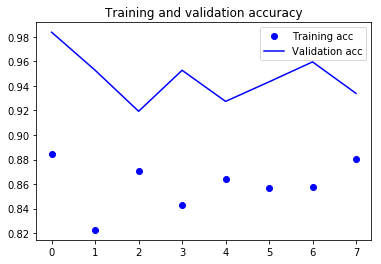

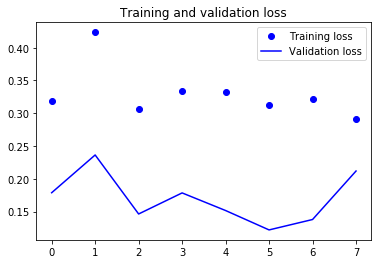

In [44]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [1]:
# Fourth Model : WEIGHT REGULARIZATION

from keras import regularizers
from keras.regularizers import l2

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),kernel_regularizer=l2(0.01), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),kernel_regularizer=l2(0.01), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3),kernel_regularizer=l2(0.01), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3),kernel_regularizer=l2(0.01), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.4))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Using TensorFlow backend.


NameError: name 'models' is not defined

In [48]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(300, 300),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=10,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=25,
      epochs=8,
      validation_data=validation_generator,
      validation_steps=7)

Found 119 images belonging to 2 classes.
Found 46 images belonging to 2 classes.
Epoch 1/8
25/25 [==============================] - 212s 8s/step - loss: 3.4180 - acc: 0.6297 - val_loss: 3.3030 - val_acc: 0.6061
Epoch 2/8
25/25 [==============================] - 205s 8s/step - loss: 2.9624 - acc: 0.7951 - val_loss: 2.7183 - val_acc: 0.8485
Epoch 3/8
25/25 [==============================] - 201s 8s/step - loss: 2.6876 - acc: 0.8680 - val_loss: 2.4131 - val_acc: 0.9194
Epoch 4/8
25/25 [==============================] - 208s 8s/step - loss: 2.4737 - acc: 0.8591 - val_loss: 2.3701 - val_acc: 0.8333
Epoch 5/8
25/25 [==============================] - 203s 8s/step - loss: 2.2707 - acc: 0.8751 - val_loss: 2.1773 - val_acc: 0.8871
Epoch 6/8
25/25 [==============================] - 223s 9s/step - loss: 2.1285 - acc: 0.9031 - val_loss: 1.9291 - val_acc: 0.9697
Epoch 7/8
25/25 [==============================] - 241s 10s/step - loss: 1.9986 - acc: 0.8835 - val_loss: 1.7822 - val_acc: 0.9394
Epoch 8/

In [50]:
model.save('band_and_calculator_small_4.h5') #Saving fouth model

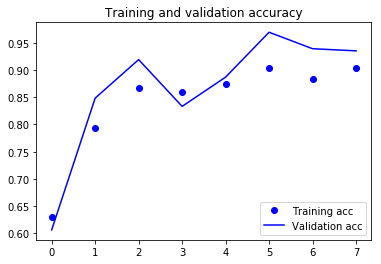

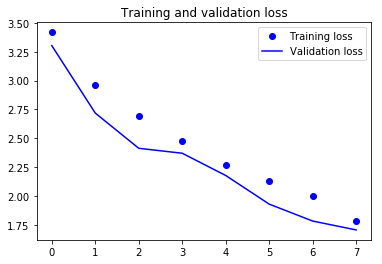

In [52]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [53]:
#model.save('band_and_calculator_small_5.h5') 